In [23]:
import warnings
warnings.filterwarnings("ignore")

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [31]:
# Read the data from the CSV file
data = pd.read_csv('Wholesale customers data.csv')
column_names = data.columns.tolist()
print(column_names)

['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


In [37]:
# Perform data normalization
scaler = StandardScaler()
X = data[data.columns[::]]
# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [43]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create a range of k values to evaluate
k_values = range(2, 11)
inertias = []
silhouette_scores = []

# Fit K-means models for each k value and calculate inertia and silhouette score
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

# Find the best k based on the elbow method
best_k_elbow = inertias.index(min(inertias)) + 2  # Add 2 to offset the range starting from 2

# Find the best k based on silhouette analysis
best_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to offset the range starting from 2

# Print the best k values
print("Best k based on Elbow Method:", best_k_elbow)
print("Best k based on Silhouette Analysis:", best_k_silhouette)


Best k based on Elbow Method: 10
Best k based on Silhouette Analysis: 2


In [56]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Create a range of k values to evaluate
k_values = range(2, 11)
silhouette_scores = []

# Fit CAH models for each k value and calculate silhouette score
for k in k_values:
    # Perform agglomerative clustering with given k
    cah = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
    cah.fit(X_scaled)

    # Calculate the silhouette score
    silhouette_avg = silhouette_score(X_scaled, cah.labels_)
    silhouette_scores.append(silhouette_avg)

# Find the best k based on silhouette analysis
best_k_silhouette = silhouette_scores.index(max(silhouette_scores)) + 2  # Add 2 to offset the range starting from 2

# Print the best k based on silhouette analysis
print("Best k based on Silhouette Analysis:", best_k_silhouette)


Best k based on Silhouette Analysis: 2


In [58]:
k=best_k_silhouette

In [59]:
k

2

Inertia: 2599.3855593561393
Silhouette Score: 0.37323636511581165


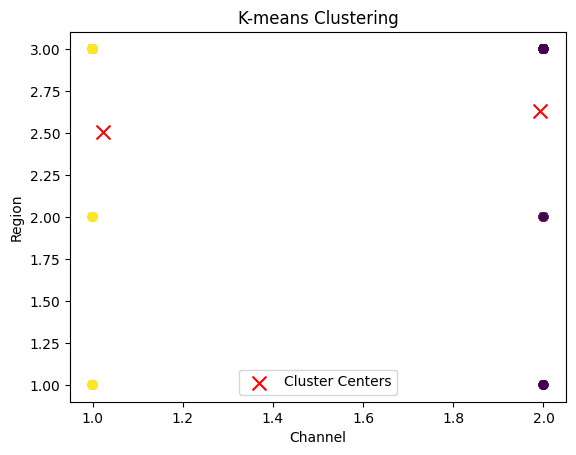

In [60]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Create the K-means clustering model
kmeans = KMeans(n_clusters=k, random_state=42)

# Fit the model on the normalized data
kmeans.fit(X_scaled)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Get the cluster centers in the original feature space
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Calculate the inertia (within-cluster sum of squares)
inertia = kmeans.inertia_
print("Inertia:", inertia)

# Calculate the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Plot a graph for analysis (example with two features)
feature1 = 'Channel'  # Name of the first feature column
feature2 = 'Region'  # Name of the second feature column

# Extract the values for plotting
x1 = X[feature1]
x2 = X[feature2]

# Plot the data points with their cluster labels
plt.scatter(x1, x2, c=labels)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', color='red', s=100, label='Cluster Centers')
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title("K-means Clustering")
plt.legend()
plt.show()


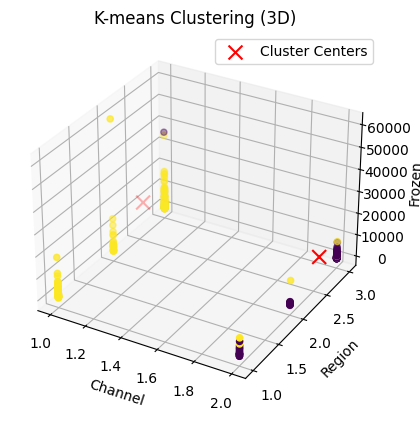

In [61]:
from mpl_toolkits.mplot3d import Axes3D

# Plot a graph for analysis (example with three features)
feature1 = 'Channel'  # Name of the first feature column
feature2 = 'Region'  # Name of the second feature column
feature3 = 'Frozen'  # Name of the third feature column

# Extract the values for plotting
x1 = X[feature1]
x2 = X[feature2]
x3 = X[feature3]

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with their cluster labels
ax.scatter(x1, x2, x3, c=labels)
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], cluster_centers[:, 2], marker='x', color='red', s=100, label='Cluster Centers')
ax.set_xlabel(feature1)
ax.set_ylabel(feature2)
ax.set_zlabel(feature3)
ax.set_title("K-means Clustering (3D)")

plt.legend()
plt.show()
